In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tf = pd.read_csv('TaxiFare.csv')

In [3]:
tf.shape 

(50000, 8)

In [4]:
tf.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
tf.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# Target Variable - Amount 

In [6]:
tf.amount.describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

Text(0.5, 1.0, 'Histogram of Taxi Fare amount')

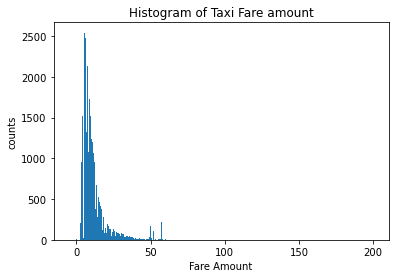

In [7]:
plt.hist(tf.amount, bins='auto')
plt.xlabel("Fare Amount")
plt.ylabel('counts')
plt.title("Histogram of Taxi Fare amount")

<AxesSubplot:>

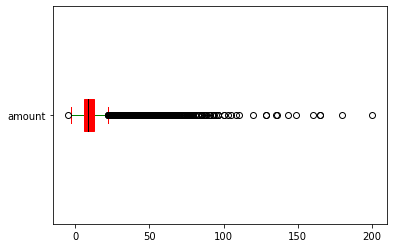

In [8]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.amount.plot.box(color=props2, patch_artist = True, vert = False)

In [9]:
iqr = tf.amount.describe()['75%'] - tf.amount.describe()['25%']
iqr

6.5

In [10]:
low_lim = tf.amount.describe()['25%']-1.5*iqr
len(tf.amount[tf.amount < low_lim])

1

In [11]:
up_lim = tf.amount.describe()['75%']+1.5*iqr 
len(tf.amount[tf.amount > up_lim])

4364

In [171]:
up_lim

40.818858500000005

In [12]:
#.amount.value_counts()==0

In [13]:
len(tf.amount[tf.amount <0])

6

In [14]:
len(tf.amount[tf.amount >150]) 

5

In [15]:
len(tf.amount[tf.amount >100])

16

In [16]:
len(tf.amount[tf.amount >50])

636

In [17]:
for i in range(22,32,1):
    tf_len = len(tf.amount[tf.amount > i])
    print('Taxi Fare paid more than:', i , 'No of passengers :', tf_len)

Taxi Fare paid more than: 22 No of passengers : 4413
Taxi Fare paid more than: 23 No of passengers : 4092
Taxi Fare paid more than: 24 No of passengers : 3828
Taxi Fare paid more than: 25 No of passengers : 3576
Taxi Fare paid more than: 26 No of passengers : 3336
Taxi Fare paid more than: 27 No of passengers : 3096
Taxi Fare paid more than: 28 No of passengers : 2931
Taxi Fare paid more than: 29 No of passengers : 2724
Taxi Fare paid more than: 30 No of passengers : 2581
Taxi Fare paid more than: 31 No of passengers : 2380


# date_time_of_pickup

In [18]:
tf.date_time_of_pickup.describe()

count                       50000
unique                      49555
top       2011-09-03 01:30:00 UTC
freq                            3
Name: date_time_of_pickup, dtype: object

In [19]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [20]:
tf.date_time_of_pickup = pd.to_datetime(tf.date_time_of_pickup)

In [21]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [22]:
tf.date_time_of_pickup.head()

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: date_time_of_pickup, dtype: datetime64[ns, UTC]

In [23]:
tf['year'] = tf["date_time_of_pickup"].dt.year
tf['month'] = tf["date_time_of_pickup"].dt.month_name()
tf['day'] = tf["date_time_of_pickup"].dt.day_name()
tf['hour'] = tf["date_time_of_pickup"].dt.hour

year

Text(0.5, 1.0, 'Yearwise counting')

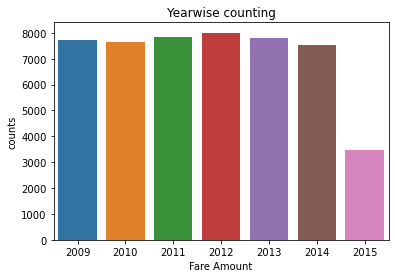

In [24]:
sns.countplot(x='year', data=tf)
plt.xlabel("Fare Amount")
plt.ylabel('counts')
plt.title("Yearwise counting")

In [25]:
tf.year.value_counts()

2012    8005
2011    7832
2013    7819
2009    7716
2010    7646
2014    7530
2015    3452
Name: year, dtype: int64

<AxesSubplot:>

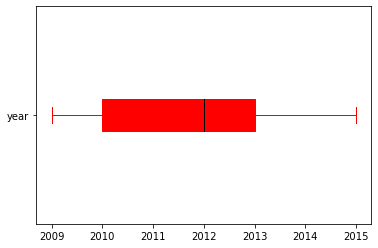

In [26]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.year.plot.box(color=props2, patch_artist = True, vert = False)

In [27]:
tf.groupby('year')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2009,7716.0,10.049168,8.447096,2.5,5.7,7.7,11.3,165.00
2010,7646.0,10.137180,8.406004,-2.9,5.7,7.7,11.3,143.00
2011,7832.0,10.465931,8.467032,2.5,5.7,7.7,11.7,96.00
2012,8005.0,11.228863,9.667937,2.5,6.0,8.5,12.5,200.00
2013,7819.0,12.439474,10.428842,-3.0,6.5,9.5,14.0,180.00
2014,7530.0,13.139649,11.311478,2.5,6.5,9.5,15.0,165.00
2015,3452.0,13.064392,10.799374,-5.0,6.5,9.5,15.0,96.25


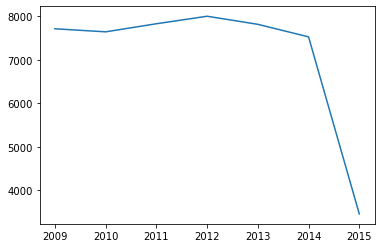

In [28]:
plt.plot(tf.groupby('year')['amount'].count())

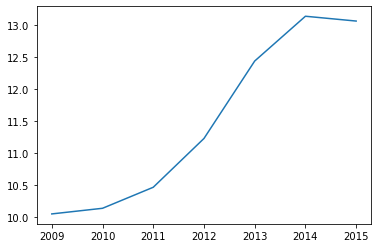

In [29]:
plt.plot(tf.groupby('year')['amount'].mean())

month

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'June'),
  Text(1, 0, 'January'),
  Text(2, 0, 'August'),
  Text(3, 0, 'April'),
  Text(4, 0, 'March'),
  Text(5, 0, 'November'),
  Text(6, 0, 'December'),
  Text(7, 0, 'September'),
  Text(8, 0, 'July'),
  Text(9, 0, 'February'),
  Text(10, 0, 'May'),
  Text(11, 0, 'October')])

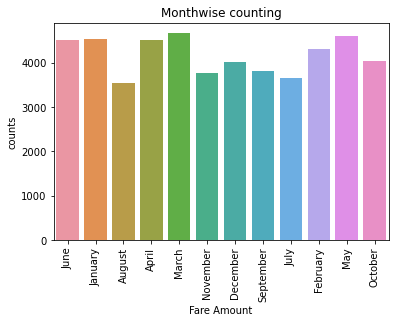

In [30]:
sns.countplot(x='month', data=tf)
plt.xlabel("Fare Amount")
plt.ylabel('counts')
plt.title("Monthwise counting")
plt.xticks(rotation=90)

In [31]:
tf.groupby('month')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
April,4519.0,11.321361,9.487037,-2.5,6.0,8.5,12.5,93.75
August,3543.0,11.316616,10.315227,-3.0,6.0,8.5,12.5,165.00
December,4015.0,11.670543,10.212445,2.5,6.0,8.5,13.0,135.00
February,4302.0,10.933728,9.510653,0.0,6.0,8.1,12.1,200.00
January,4546.0,10.700930,9.235979,2.5,5.7,8.0,11.7,180.00
July,3656.0,10.937166,8.947714,2.5,6.0,8.1,12.1,120.00
June,4516.0,11.457146,9.267060,2.5,6.1,8.5,13.0,96.25
March,4671.0,11.085596,9.172258,-5.0,5.8,8.1,12.5,80.50
May,4612.0,11.868103,10.307439,0.0,6.1,8.9,13.3,160.00


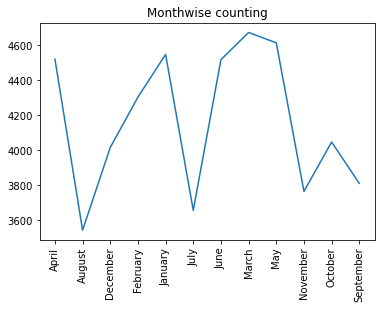

In [32]:
plt.plot(tf.groupby('month')['amount'].count())
plt.xticks(rotation=90)
plt.title("Monthwise counting")
plt.show()

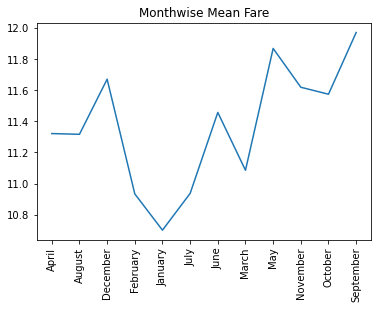

In [33]:
plt.plot(tf.groupby('month')['amount'].mean())
plt.xticks(rotation=90)
plt.title("Monthwise Mean Fare")
plt.show()

In [34]:
month = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5,
         'June':6, 'July':7, 'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}

In [35]:
tf.month = [month[item] for item in tf.month]
print(tf.month)

0         6
1         1
2         8
3         4
4         3
         ..
49995     6
49996     6
49997     1
49998    11
49999     1
Name: month, Length: 50000, dtype: int64


In [36]:
tf.month

0         6
1         1
2         8
3         4
4         3
         ..
49995     6
49996     6
49997     1
49998    11
49999     1
Name: month, Length: 50000, dtype: int64

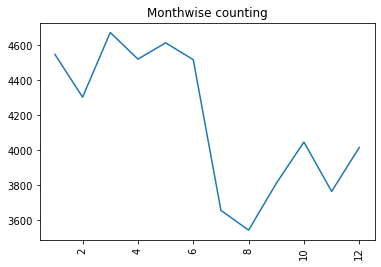

In [37]:
plt.plot(tf.groupby('month')['amount'].count())
plt.xticks(rotation=90)
plt.title("Monthwise counting")
plt.show()

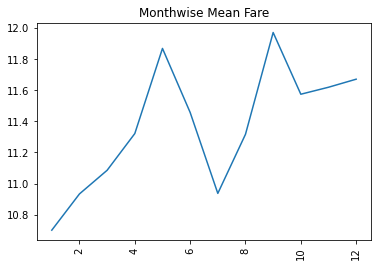

In [38]:
plt.plot(tf.groupby('month')['amount'].mean())
plt.xticks(rotation=90)
plt.title("Monthwise Mean Fare")
plt.show()


day

Text(0.5, 1.0, 'Weekday wise counting')

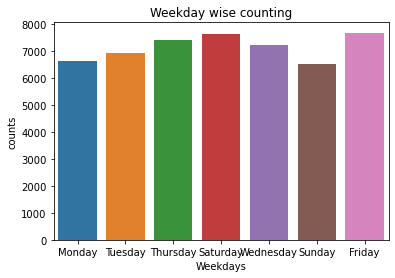

In [39]:
sns.countplot(x='day', data=tf)
plt.xlabel("Weekdays")
plt.ylabel('counts')
plt.title("Weekday wise counting")

In [40]:
tf.groupby('day')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Friday,7668.0,11.402240,9.508604,-3.0,6.1,8.5,13.0,165.00
Monday,6639.0,11.569060,10.536296,-5.0,6.0,8.1,12.5,160.00
Saturday,7630.0,11.142731,9.201668,2.5,6.0,8.5,12.5,165.00
Sunday,6518.0,11.520578,9.954766,-2.5,6.0,8.5,13.0,200.00
Thursday,7406.0,11.668594,9.983516,-2.5,6.0,8.5,13.0,149.00
Tuesday,6927.0,11.166999,9.282690,-2.9,6.0,8.5,12.5,92.49
Wednesday,7212.0,11.104773,9.357399,2.5,6.0,8.5,12.5,180.00


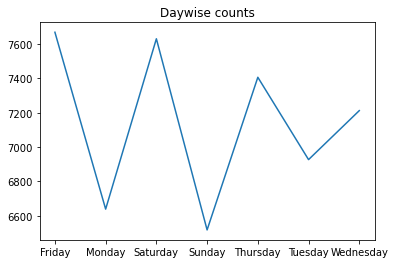

In [41]:
plt.plot(tf.groupby('day')['amount'].count())
plt.title("Daywise counts")
plt.show()

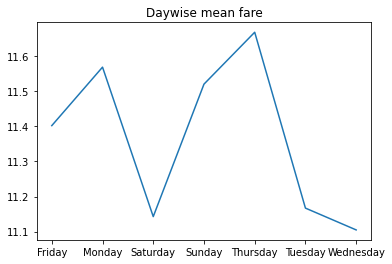

In [42]:
plt.plot(tf.groupby('day')['amount'].mean())
plt.title("Daywise mean fare")
plt.show()

In [43]:
day = {'Sunday':1,'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 
       'Friday':6, 'Saturday':7 }

In [44]:
tf.day = [day[item] for item in tf.day]
tf.day.head()


0    2
1    3
2    5
3    7
4    3
Name: day, dtype: int64

In [45]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   year                  50000 non-null  int64              
 9   month                 50000 non-null  int64              
 10  day                   50000 non-null  int64              
 11  hour                  50000 non-null  int64              
dtypes: d

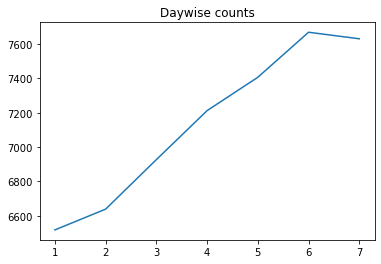

In [46]:
plt.plot(tf.groupby('day')['amount'].count())
plt.title("Daywise counts")
plt.show()

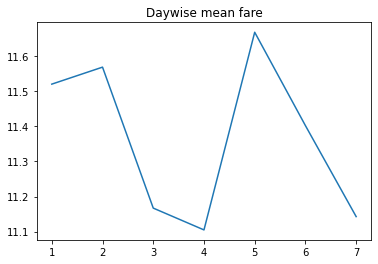

In [47]:
plt.plot(tf.groupby('day')['amount'].mean())
plt.title("Daywise mean fare")
plt.show()

hour

Text(0.5, 1.0, 'Hourly counting')

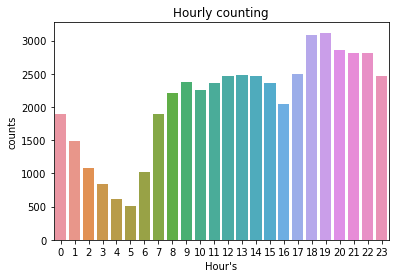

In [48]:
sns.countplot(x='hour', data=tf)
plt.xlabel("Hour's")
plt.ylabel('counts')
plt.title("Hourly counting")

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,1890.0,11.922873,8.592224,2.5,6.50,9.30,14.50,88.25
1,1484.0,11.726065,9.043038,2.5,6.50,9.00,14.10,128.83
2,1088.0,11.246765,8.628222,2.5,6.10,8.90,13.70,136.00
3,847.0,12.087237,12.358673,2.5,6.00,8.90,14.50,200.00
4,610.0,13.740623,10.944349,2.5,6.50,10.00,17.70,80.35
5,508.0,15.338209,14.856332,-2.5,5.95,9.15,18.60,82.50
6,1017.0,12.280570,12.168081,2.5,5.30,7.70,12.50,78.50
7,1899.0,11.121827,10.251250,2.5,5.70,8.00,11.70,87.00
8,2209.0,10.611852,8.604485,-3.0,6.00,8.10,11.70,95.00


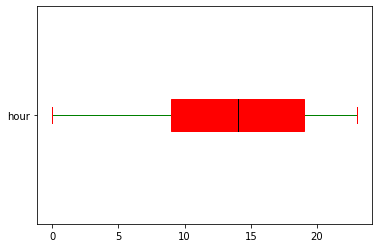

In [49]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.hour.plot.box(color=props2, patch_artist = True, vert = False)
tf.groupby('hour')['amount'].describe()

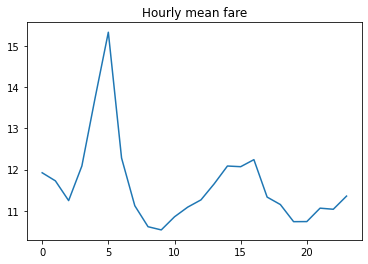

In [50]:
plt.plot(tf.groupby('hour')['amount'].mean())
plt.title("Hourly mean fare")
plt.show()

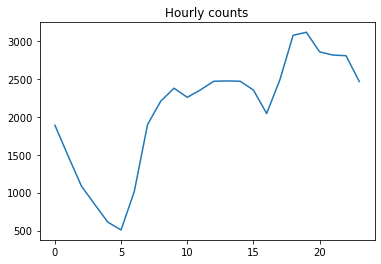

In [51]:
plt.plot(tf.groupby('hour')['amount'].count())
plt.title("Hourly counts")
plt.show()

# longitude_of_pickup

In [52]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   year                  50000 non-null  int64              
 9   month                 50000 non-null  int64              
 10  day                   50000 non-null  int64              
 11  hour                  50000 non-null  int64              
dtypes: d

In [53]:
tf.longitude_of_pickup.describe()

count    50000.000000
mean       -72.509756
std         10.393860
min        -75.423848
25%        -73.992062
50%        -73.981840
75%        -73.967148
max         40.783472
Name: longitude_of_pickup, dtype: float64

<AxesSubplot:>

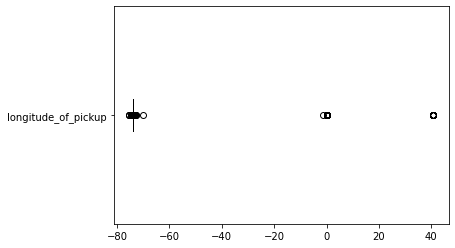

In [54]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.longitude_of_pickup.plot.box(color=props2, patch_artist = True, vert = False)

In [55]:
iqr = tf.longitude_of_pickup.describe()['75%'] - tf.longitude_of_pickup.describe()['25%']

In [172]:
low_lim = tf.longitude_of_pickup.describe()['25%']-1.5*iqr 
print(low_lim)

len(tf.longitude_of_pickup[tf.longitude_of_pickup < low_lim])

-74.04275450000002


44

In [173]:
up_lim = tf.longitude_of_pickup.describe()['75%']+1.5*iqr
print(up_lim)
len(tf.longitude_of_pickup[tf.longitude_of_pickup > up_lim])


-73.91645799999999


3097

In [58]:
len(tf.longitude_of_pickup[tf.longitude_of_pickup > -73])

983

In [59]:
for i in np.arange(-74,-72,.1):
    outliers = len(tf.longitude_of_pickup[tf.longitude_of_pickup > i])
    print(i, outliers)

-74.0 43396
-73.9 2973
-73.80000000000001 1771
-73.70000000000002 1016
-73.60000000000002 1007
-73.50000000000003 1005
-73.40000000000003 1002
-73.30000000000004 1001
-73.20000000000005 1001
-73.10000000000005 983
-73.00000000000006 983
-72.90000000000006 983
-72.80000000000007 981
-72.70000000000007 981
-72.60000000000008 981
-72.50000000000009 981
-72.40000000000009 981
-72.3000000000001 981
-72.2000000000001 981
-72.10000000000011 981


# latitude_of_pickup

In [60]:
tf.latitude_of_pickup.describe()

count    50000.000000
mean        39.933759
std          6.224857
min        -74.006893
25%         40.734880
50%         40.752678
75%         40.767360
max        401.083332
Name: latitude_of_pickup, dtype: float64

<AxesSubplot:>

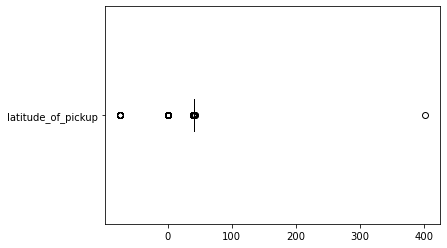

In [61]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.latitude_of_pickup.plot.box(color=props2, patch_artist = True, vert = False)

In [62]:
#Latitude range from -90 to 90 - removing which are not in this range
tf = tf[tf.latitude_of_pickup <= 90]

In [63]:
tf.latitude_of_pickup.describe()

count    49999.000000
mean        39.926536
std          6.011729
min        -74.006893
25%         40.734880
50%         40.752677
75%         40.767359
max         43.098708
Name: latitude_of_pickup, dtype: float64

<AxesSubplot:>

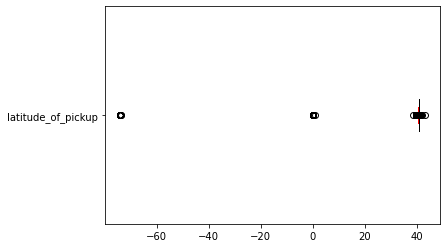

In [64]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.latitude_of_pickup.plot.box(color=props2, patch_artist = True, vert = False)

In [65]:
iqr = tf.latitude_of_pickup.describe()['75%'] - tf.latitude_of_pickup.describe()['25%']

In [174]:
low_lim = tf.latitude_of_pickup.describe()['25%']-1.5*iqr 
print(low_lim)
len(tf.latitude_of_pickup[tf.latitude_of_pickup < low_lim])

40.68418749999999


2070

In [175]:
up_lim = tf.latitude_of_pickup.describe()['75%']+1.5*iqr
print(up_lim)
len(tf.latitude_of_pickup[tf.latitude_of_pickup > up_lim])

40.81805200000001


223

In [68]:
for i in np.arange(40.68,42,.1):
    outliers = len(tf.latitude_of_pickup[tf.latitude_of_pickup > i])
    print(i, outliers)

40.68 48026
40.78 4924
40.88 42
40.980000000000004 29
41.080000000000005 24
41.18000000000001 23
41.28000000000001 23
41.38000000000001 5
41.48000000000001 4
41.58000000000001 3
41.680000000000014 2
41.780000000000015 2
41.88000000000002 2
41.98000000000002 2


# longitude_of_dropoff

In [69]:
tf.longitude_of_dropoff.describe()

count    49999.000000
mean       -72.504587
std         10.407672
min        -84.654241
25%        -73.991152
50%        -73.980083
75%        -73.963584
max         40.851027
Name: longitude_of_dropoff, dtype: float64

<AxesSubplot:>

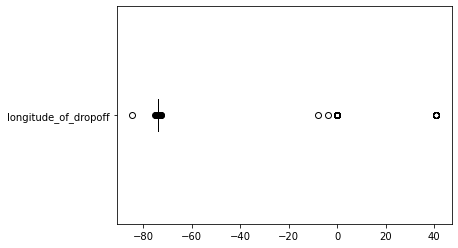

In [70]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.longitude_of_dropoff.plot.box(color=props2, patch_artist = True, vert = False)

In [71]:
iqr = tf.longitude_of_dropoff.describe()['75%'] - tf.longitude_of_dropoff.describe()['25%']

In [72]:
low_lim = tf.longitude_of_dropoff.describe()['25%']-1.5*iqr 
len(tf.longitude_of_dropoff[tf.longitude_of_dropoff < low_lim])

150

In [73]:
up_lim = tf.longitude_of_dropoff.describe()['75%']+1.5*iqr 
len(tf.longitude_of_dropoff[tf.longitude_of_dropoff > up_lim])

3439

In [74]:
for i in np.arange(-76,-74,.1):
    outliers = len(tf.longitude_of_dropoff[tf.longitude_of_dropoff < i])
    print(i, outliers)

-76.0 1
-75.9 1
-75.80000000000001 1
-75.70000000000002 1
-75.60000000000002 1
-75.50000000000003 1
-75.40000000000003 1
-75.30000000000004 2
-75.20000000000005 2
-75.10000000000005 2
-75.00000000000006 2
-74.90000000000006 2
-74.80000000000007 2
-74.70000000000007 3
-74.60000000000008 5
-74.50000000000009 5
-74.40000000000009 6
-74.3000000000001 8
-74.2000000000001 15
-74.10000000000011 100


# latitude_of_dropoff

In [75]:
tf.latitude_of_dropoff.describe()

count    49999.000000
mean        39.926234
std          6.014796
min        -74.006377
25%         40.734371
50%         40.753371
75%         40.768166
max         43.415190
Name: latitude_of_dropoff, dtype: float64

<AxesSubplot:>

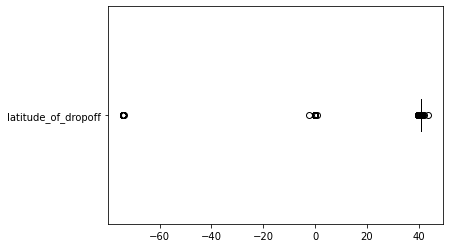

In [76]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.latitude_of_dropoff.plot.box(color=props2, patch_artist = True, vert = False)

In [77]:
iqr = tf.latitude_of_dropoff.describe()['75%'] - tf.latitude_of_dropoff.describe()['25%'] 

In [78]:
low_lim = tf.latitude_of_dropoff.describe()['25%']-1.5*iqr 
len(tf.latitude_of_dropoff[tf.latitude_of_dropoff < low_lim]) 

2396

In [79]:
up_lim = tf.latitude_of_dropoff.describe()['75%']+1.5*iqr 
len(tf.latitude_of_dropoff[tf.latitude_of_dropoff > up_lim])

743

In [80]:
for i in np.arange(38,40.7,.05):
    outliers = len(tf.latitude_of_dropoff[tf.latitude_of_dropoff < i])
    print(i, outliers)

38.0 978
38.05 978
38.099999999999994 978
38.14999999999999 978
38.19999999999999 978
38.249999999999986 978
38.29999999999998 978
38.34999999999998 978
38.39999999999998 978
38.449999999999974 978
38.49999999999997 978
38.54999999999997 978
38.599999999999966 978
38.64999999999996 978
38.69999999999996 978
38.74999999999996 978
38.799999999999955 978
38.84999999999995 978
38.89999999999995 978
38.949999999999946 978
38.99999999999994 978
39.04999999999994 978
39.09999999999994 978
39.149999999999935 978
39.19999999999993 978
39.24999999999993 978
39.299999999999926 978
39.34999999999992 978
39.39999999999992 978
39.44999999999992 978
39.499999999999915 978
39.54999999999991 978
39.59999999999991 978
39.649999999999906 984
39.6999999999999 985
39.7499999999999 985
39.7999999999999 985
39.849999999999895 985
39.89999999999989 985
39.94999999999989 985
39.999999999999886 985
40.04999999999988 985
40.09999999999988 985
40.14999999999988 985
40.199999999999875 988
40.24999999999987 988
40.

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude_of_pickup', ylabel='latitude_of_pickup'>

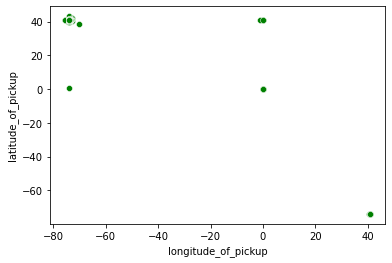

In [81]:
sns.scatterplot(tf.longitude_of_pickup,tf.latitude_of_pickup, color='green')

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude_of_dropoff', ylabel='latitude_of_dropoff'>

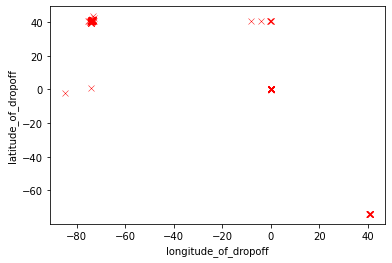

In [82]:
sns.scatterplot(tf.longitude_of_dropoff,tf.latitude_of_dropoff, marker = 'x', color='red')

In [83]:
#Due to outliers the plot is overlapped

In [84]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [85]:
tf['distance_travelled'] = distance(tf.latitude_of_pickup, tf.longitude_of_pickup,
                                    tf.latitude_of_dropoff, tf.longitude_of_dropoff)

In [176]:
tf.distance_travelled.head()

0    0.640487
1    5.250670
2    0.863411
3    1.739386
4    1.242218
Name: distance_travelled, dtype: float64

In [177]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             49999 non-null  object             
 1   amount                49999 non-null  float64            
 2   date_time_of_pickup   49999 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   49999 non-null  float64            
 4   latitude_of_pickup    49999 non-null  float64            
 5   longitude_of_dropoff  49999 non-null  float64            
 6   latitude_of_dropoff   49999 non-null  float64            
 7   no_of_passenger       49999 non-null  int64              
 8   year                  49999 non-null  int64              
 9   month                 49999 non-null  int64              
 10  day                   49999 non-null  int64              
 11  hour                  49999 non-null  int64              
 12  dist

In [160]:
tf.distance_travelled.max()

5385.932976730134

In [145]:
tf.distance_travelled.min()

0.0

Text(0.5, 1.0, 'Histogram of Distance Travelled')

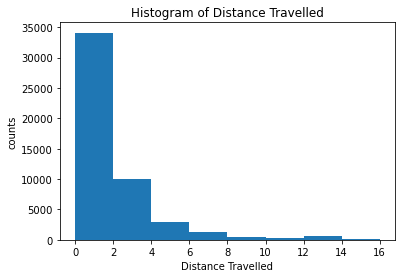

In [167]:
plt.hist(tf.distance_travelled, bins=[0,2,4,6,8,10,12,14,16])
plt.xlabel("Distance Travelled")
plt.ylabel('counts')
plt.title("Histogram of Distance Travelled")

In [88]:
tf.distance_travelled.describe()

count    49999.000000
mean        11.500736
std        220.939627
min          0.000000
25%          0.760013
50%          1.317338
75%          2.420516
max       5385.932977
Name: distance_travelled, dtype: float64

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance_travelled', ylabel='amount'>

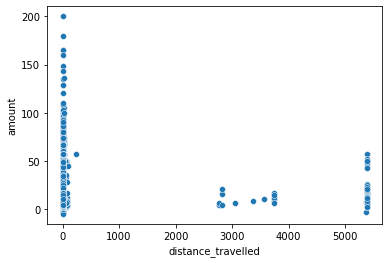

In [89]:
sns.scatterplot(tf.distance_travelled, tf.amount)

<AxesSubplot:>

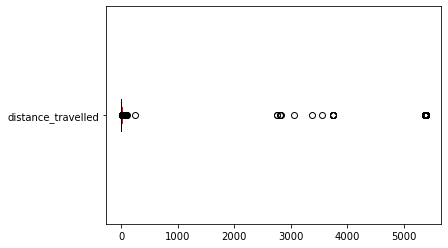

In [90]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.distance_travelled.plot.box(color=props2, patch_artist = True, vert = False)

In [91]:
tf.no_of_passenger.describe()

count    49999.000000
mean         1.667853
std          1.289204
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [92]:
tf.no_of_passenger.value_counts()

1    34807
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

Text(0.5, 1.0, "No of Passenger's")

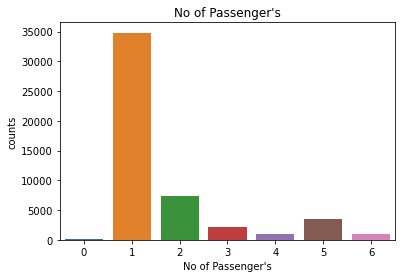

In [93]:
sns.countplot(x='no_of_passenger', data=tf)
plt.xlabel("No of Passenger's")
plt.ylabel('counts')
plt.title("No of Passenger's")

<AxesSubplot:>

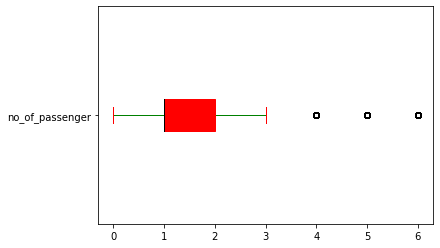

In [94]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.no_of_passenger.plot.box(color=props2, patch_artist = True, vert = False)

In [95]:
tf.to_csv('taxifare_N.csv', index=False)

In [96]:
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
tf.info()
x = tf.iloc[:,3:13] 
x.info()
y = tf.iloc[:,1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             49999 non-null  object             
 1   amount                49999 non-null  float64            
 2   date_time_of_pickup   49999 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   49999 non-null  float64            
 4   latitude_of_pickup    49999 non-null  float64            
 5   longitude_of_dropoff  49999 non-null  float64            
 6   latitude_of_dropoff   49999 non-null  float64            
 7   no_of_passenger       49999 non-null  int64              
 8   year                  49999 non-null  int64              
 9   month                 49999 non-null  int64              
 10  day                   49999 non-null  int64              
 11  hour                  49999 non-null  int64              
 12  dist

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)

In [100]:
len(x_train) 

34999

In [101]:
len(x_test) 

15000

In [102]:
len(y_train) 

34999

In [103]:
len(y_test)

15000

# Decision Tree

In [104]:
clf = tree.DecisionTreeRegressor()
tf_clf = clf.fit(x_train, y_train)

In [105]:
#Prediction
y_pred = tf_clf.predict(x_test)

In [106]:
#RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print(RMSE)

6.512033503189819


In [107]:
#plot
len(y_test)
obs_No = list(range(1, 15001))
x = obs_No

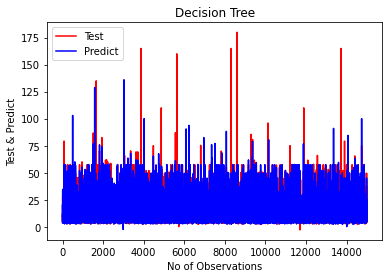

In [108]:
plt.plot(x, y_pred, 'r')
plt.plot(x, y_test, 'b')
plt.xlabel('No of Observations')
plt.ylabel('Test & Predict')
plt.title('Decision Tree')
plt.legend(labels= ('Test', 'Predict'), loc= 'upper left')
plt.show()

# Random Forest

In [109]:
rfr = RandomForestRegressor(n_estimators = 300) 
tf_rfr = rfr.fit(x_train, y_train)

In [110]:
#Prediction
y_pred = tf_rfr.predict(x_test)

In [111]:
#RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print(RMSE)

4.387681028861002


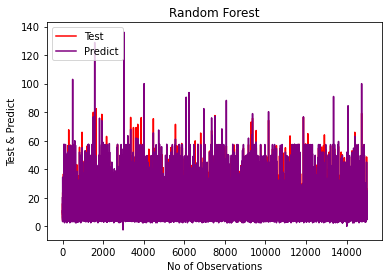

In [112]:
#Plot DONT DO!
plt.plot(x, y_pred, 'r')
plt.plot(x, y_test, 'purple')
plt.xlabel('No of Observations')
plt.ylabel('Test & Predict')
plt.title('Random Forest')
plt.legend(labels= ('Test', 'Predict'), loc= 'upper left')
plt.show()

In [113]:
#Importance of variables
#Extract Feature importance
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': tf_rfr.feature_importances_}).\
                    sort_values('importance', ascending=False)

In [114]:
fi.head()

,feature,importance
9,distance_travelled,0.743142
2,longitude_of_dropoff,0.055563
0,longitude_of_pickup,0.042139
3,latitude_of_dropoff,0.037591
1,latitude_of_pickup,0.033493


In [115]:
tf1 = pd.read_csv('taxifare_N.csv')
tf1 = tf1.sample(100, random_state=21)
tf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 26732 to 34539
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             100 non-null    object 
 1   amount                100 non-null    float64
 2   date_time_of_pickup   100 non-null    object 
 3   longitude_of_pickup   100 non-null    float64
 4   latitude_of_pickup    100 non-null    float64
 5   longitude_of_dropoff  100 non-null    float64
 6   latitude_of_dropoff   100 non-null    float64
 7   no_of_passenger       100 non-null    int64  
 8   year                  100 non-null    int64  
 9   month                 100 non-null    int64  
 10  day                   100 non-null    int64  
 11  hour                  100 non-null    int64  
 12  distance_travelled    100 non-null    float64
dtypes: float64(6), int64(5), object(2)
memory usage: 10.9+ KB


In [116]:
x1 = tf1.iloc[:,3:13]
y1 = tf1.iloc[:,1]

# Decision Tree

In [117]:
clf = tree.DecisionTreeRegressor()
tf_clf = clf.fit(x1, y1)

In [118]:
#Prediction
y_pred = tf_clf.predict(x1)

In [119]:
#RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1, y_pred)
RMSE = np.sqrt(mse)
print(RMSE)

0.0


In [120]:
#plot
len(y_test)
obs_No = list(range(1, 101))
x = obs_No

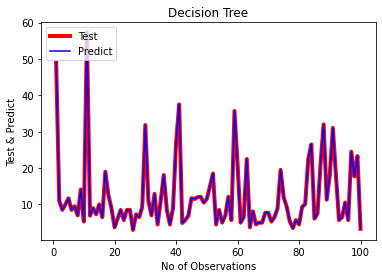

In [121]:
plt.plot(x, y_pred, 'r', linewidth=4)
plt.plot(x, y1, 'b')
plt.xlabel('No of Observations')
plt.ylabel('Test & Predict')
plt.title('Decision Tree')
plt.legend(labels= ('Test', 'Predict'), loc= 'upper left')
plt.show()

In [122]:
#Random Forest
rfr = RandomForestRegressor()
tf_rfr = rfr.fit(x1, y1)

In [123]:
#Prediction
y_pred = tf_rfr.predict(x1)

In [124]:
#RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1, y_pred)
RMSE = np.sqrt(mse)
print(RMSE)

1.859689029730511


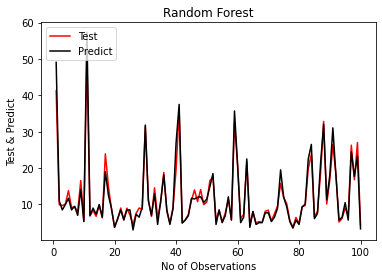

In [125]:
plt.plot(x, y_pred, 'r')
plt.plot(x, y1, 'black')
plt.xlabel('No of Observations')
plt.ylabel('Test & Predict')
plt.title('Random Forest')
plt.legend(labels= ('Test', 'Predict'), loc= 'upper left')
plt.show()

In [126]:
#Build Random Forest Model with hyperparameters
# Number of trees in random forest
#linspace to get a sequence of number with evenly space
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num=3)] 

In [127]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

In [128]:
# Maximum number of levels in tree
max_depth = [2,5]

In [129]:
# Minimum number of samples required to split a node
min_samples_split = [10,20]

In [130]:
# Minimum number of samples required at each leaf node
min_samples_leaf = [5,10]

In [131]:
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [132]:
#CV - Cross Validation
#n_jobs = no of jobs to run in parallel - it helps to reduce the load on processor 

In [133]:
# Create the parameter grid as dictionary
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5], 'min_samples_split': [10, 20], 'min_samples_leaf': [5, 10], 'bootstrap': [True, False]}


In [134]:
#Building the model
rfr =RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
rfr_Grid = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 4)
rfr_Grid_GS = rfr_Grid.fit(x1, y1)

In [178]:
#Best Parameters
rfr_Grid_GS.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [136]:
#Prediction
y_pred_gs = rfr_Grid_GS.predict(x1)
len(y_pred_gs)
print(y_pred_gs)

[34.36502274  8.13415762 10.8104379   8.17235873 16.63884033  7.95493916
  8.17235873  7.56483156 21.31614368  7.41097316 34.39891934  7.52099167
  7.55004822  7.2840217   8.17235873  7.2840217  26.50191917 14.20766545
  7.56483156  7.2840217   7.2840217   8.17235873  7.2840217   8.43736613
  7.4286269   7.2840217   7.76311313  7.75270393  7.70318579 34.06530956
 10.81043525  7.2840217  14.79523383  8.14484007  8.76588041 19.98013558
  7.80617634  7.2840217   8.17235873  8.51583053 34.51063179  7.2840217
  7.2840217   7.56483156 10.78296711 16.49512499  7.72029894 16.27114412
  8.43736613  8.24088486 20.61617194 16.17134604  7.57361102  7.2840217
  7.2840217   8.17235873  7.75270393  7.2840217  34.03578481 22.17947996
  7.49543473  7.89292475 20.84345692  7.32768116  7.56483156  7.2840217
  7.2840217   7.35254783  7.69917209  7.6114846   7.35254783  7.2840217
  9.09711043 11.51461714 10.81043525 10.78296711  7.2840217   7.2840217
  8.46194805  7.2840217   8.21275351  8.21275351 16.3260

In [137]:
#RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1, y_pred_gs)
RMSE = np.sqrt(mse)
print(RMSE)

4.60913352144201


In [186]:
lst_train = []
lst_test = []

for i in range(1,6):
    clf = tree.DecisionTreeRegressor(max_depth = i)
    tf_clf = clf.fit(x_train, y_train)
    y_pred_train = tf_clf.predict(x_train)    
    mse = mean_squared_error(y_train, y_pred_train) 
    lst_train.append(np.sqrt(mse))
    
    y_pred_test = tf_clf.predict(x_test)    
    mse = mean_squared_error(y_test, y_pred_test) 
    lst_test.append(np.sqrt(mse))
    

In [187]:
lst_train

[7.023018600576308,
 5.974054704949698,
 5.480617609810803,
 5.118028359531034,
 4.78139820753567]

In [188]:
lst_test

[6.663252619282954,
 5.511627310383484,
 5.3238858247435585,
 5.060346458628639,
 4.966248834286403]